# Compare with RM

In this notebook, I check if the runs had the expected output.

# Copacabana 

In this lines, I'll load the copacabana output and investigate the addition of the Beta Distribution.

In [1]:
import matplotlib.pyplot as plt
import matplotlib

import seaborn as sns; sns.set(color_codes=True)
plt.rcParams.update({'font.size': 16})
sns.set_style("whitegrid")

import numpy as np
from scipy.interpolate import interp1d
import scipy

from astropy.table import Table, vstack
from astropy.io.fits import getdata

In [2]:
import sys
sys.path.append("/home/s1/jesteves/git/ccopa/python/")
from main import copacabana
from make_input_files.make_input_datasets import *
from make_input_files.make_photoz_pz import generate_photoz_models

/cvmfs/des.opensciencegrid.org/fnal/anaconda2/envs/des18a/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
sns.set_context("notebook")

In [4]:
root = '/home/s1/jesteves/git/buzzardAnalysis/mainAnalysis/'
cfg  = root+'config_buzzard_rm_v2_bcp.yaml'

copa1 = copacabana(cfg,dataset='buzzard_v2')

master file: 
 /data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/y3_rm/output/tiles/buzzard_v2.0.0_rm_lgt5_lw20_copa_00519.hdf5
/data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/y3_rm/output/tiles/buzzard_v2.0.0_rm_lgt5_lw20_copa_00523.hdf5
/data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/y3_rm/output/tiles/buzzard_v2.0.0_rm_lgt5_lw20_copa_00524.hdf5
/data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/y3_rm/output/tiles/buzzard_v2.0.0_rm_lgt5_lw20_copa_00525.hdf5
/data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/y3_rm/output/tiles/buzzard_v2.0.0_rm_lgt5_lw20_copa_00526.hdf5
/data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/y3_rm/output/tiles/buzzard_v2.0.0_rm_lgt5_lw20_copa_00527.hdf5
/data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/y3_rm/output/tiles/buzzard_v2.0.0_rm_lgt5_lw20_copa_00528.hdf5
/data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/y3_rm/output/tiles/buzzard_v2.0.0_rm_lgt5_lw20_copa_00529.hdf5
/data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/y3_rm/output/tiles/buzzard_v2.0.0_rm_lgt

In [5]:
root = '/home/s1/jesteves/git/buzzardAnalysis/mainAnalysis/'
cfg  = root+'config_buzzard_rm_v2.yaml'

copa2 = copacabana(cfg,dataset='buzzard_v2')

master file: 
 /data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/y3_rm/output/tiles/buzzard_v2.0.0_rm_lgt20_copa_00000.hdf5
/data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/y3_rm/output/tiles/buzzard_v2.0.0_rm_lgt20_copa_00256.hdf5
/data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/y3_rm/output/tiles/buzzard_v2.0.0_rm_lgt20_copa_00257.hdf5
/data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/y3_rm/output/tiles/buzzard_v2.0.0_rm_lgt20_copa_00260.hdf5
/data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/y3_rm/output/tiles/buzzard_v2.0.0_rm_lgt20_copa_00261.hdf5
/data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/y3_rm/output/tiles/buzzard_v2.0.0_rm_lgt20_copa_00263.hdf5
/data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/y3_rm/output/tiles/buzzard_v2.0.0_rm_lgt20_copa_00269.hdf5
/data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/y3_rm/output/tiles/buzzard_v2.0.0_rm_lgt20_copa_00271.hdf5
/data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/y3_rm/output/tiles/buzzard_v2.0.0_rm_lgt20_copa_00272.hdf5
/data/des61.a

In [6]:
runs=['gauss001_r200_02Lstar', 'gauss003_r200_02Lstar', 'gauss005_r200_02Lstar', 'dnf_model_r200_02Lstar']

In [7]:
def match_copa_redmapper(copa1,copa2,runs1,runs2):
    c1 = join_copa_output(copa1,runs1)
    c2 = join_copa_output(copa2,runs2)
    rm = load_redmapper()

    rmc1 = join_copa_redmapper(rm,c1)
    rmc2 = join_copa_redmapper(rm,c2)

    rmc1 = rmc1[rmc1['LAMBDA_CHISQ']<20.]

    joined = vstack([rmc1,rmc2])
    return joined
    #return rmc1

def join_copa_output(copa,runs):
    cut = ['CID','MU', 'MU_TRUE','MU_ERR_JK','MU_TRUE_ERR_JK','Ngals','Ngals_true']
    output = []
    for run_name in runs:
        dat = copa.load_copa_out('cluster',run_name)
        output.append(dat)
        
    base = Table(output[0]['CID','M200_true','redshift','tile'].copy())
    new = base.copy()
    for i in range(len(runs)):
        dat = output[i].copy()
        cut2= ['CID']
        cut2+= [col+'_%s'%runs[i] for col in cut[1:]]

        for col,col_new in zip(cut[1:],cut2[1:]):
            dat.rename_column(col,col_new)
        new = join(new,dat[cut2],keys='CID')

    # new.rename_column('CID','haloid')
    new.rename_column('M200_true','M200')
    
    return new

def load_redmapper():
    path   = '/data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/y3_rm/halos/'
    rmfile = path+'buzzard-1.9.8_3y3a_run_halos_lambda_chisq.fit'
    rmfile2= path+'buzzard-1.9.8_3y3a_run_halos_profiles.fit'

    rmcat1= Table(getdata(rmfile))
    rmcat2= Table(getdata(rmfile2))

    rmcat2.rename_column('Mvir','M200')
    rmcat2.rename_column('haloid','CID')
    rmcat1.rename_column('HALOID','CID')

    rm = join(rmcat1,rmcat2['CID','M200','cosi'],keys=['CID','M200'])
    rm = rm[(rm['Z_LAMBDA']>=0.2)&(rm['Z_LAMBDA']<=0.65)]
    
    return rm

def join_copa_redmapper(rm,new):
    cut = (new['redshift']>=0.2)&(new['redshift']<=0.65)
    cols= ['CID','M200','LAMBDA_CHISQ', 'cosi']

    joined = join(rm[cols],new[cut],keys=['CID','M200'])
    return joined



In [8]:
outpath = '/data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/y3_rm/output/to_heidi/'
# fname   = outpath+'buzzard_v2_lambda_gt20_mu-star_rhod.fits'
fname   = outpath+'buzzard_v2_lambda_gt5_small_mu-star_r200.fits'


In [9]:
if os.path.isfile(fname):
    joined = Table(getdata(fname))
else:
    joined = match_copa_redmapper(copa1,copa2,runs,runs)
    joined.write(fname,format='fits',overwrite=True)    

In [27]:
root = '/home/s1/jesteves/git/buzzardAnalysis/mainAnalysis/'
cfg  = root+'config_buzzard_v2.yaml'

copa = copacabana(cfg,dataset='buzzard_v2')

run_name = u'gauss003_r200_02Lstar_nfw'
cat = copa.load_copa_out('cluster',run_name)

mask = (cat['redshift']<=0.65)&(cat['redshift']>=0.20)&(cat['MU']>0.)&(cat['Ngals_true']>0.)

print('masked fraction: %.2f'%(1.*np.count_nonzero(mask)/len(cat)))
cat  = cat[mask] 

cat.rename_column('M200_true','M200')

master file: 
 /data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/y3/output/tiles/buzzard_v2.0.0_copa_00017.hdf5
/data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/y3/output/tiles/buzzard_v2.0.0_copa_00018.hdf5
/data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/y3/output/tiles/buzzard_v2.0.0_copa_00019.hdf5
/data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/y3/output/tiles/buzzard_v2.0.0_copa_00020.hdf5
/data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/y3/output/tiles/buzzard_v2.0.0_copa_00022.hdf5
/data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/y3/output/tiles/buzzard_v2.0.0_copa_00032.hdf5
/data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/y3/output/tiles/buzzard_v2.0.0_copa_00033.hdf5
/data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/y3/output/tiles/buzzard_v2.0.0_copa_00034.hdf5
/data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/y3/output/tiles/buzzard_v2.0.0_copa_00035.hdf5
/data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/y3/output/tiles/buzzard_v2.0.0_copa_00038.hdf5
/data/des61.a/data/johnny

In [38]:
path   = '/data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/y3_rm/halos/'
rmfile2= path+'buzzard-1.9.8_3y3a_run_halos_profiles.fit'
rmcat2= Table(getdata(rmfile2))

rmcat = rmcat2[rmcat2['cosi']>=0.]
rmcat.rename_column('haloid','CID')
rmcat.rename_column('Mvir','M200')

cat2 = join(cat,rmcat['CID','M200','cosi'],keys=['CID','M200'])

In [10]:
joined.colnames

['CID',
 'M200',
 'LAMBDA_CHISQ',
 'cosi',
 'redshift',
 'tile',
 'MU_gauss001_r200_02Lstar',
 'MU_TRUE_gauss001_r200_02Lstar',
 'MU_ERR_JK_gauss001_r200_02Lstar',
 'MU_TRUE_ERR_JK_gauss001_r200_02Lstar',
 'Ngals_gauss001_r200_02Lstar',
 'Ngals_true_gauss001_r200_02Lstar',
 'MU_gauss003_r200_02Lstar',
 'MU_TRUE_gauss003_r200_02Lstar',
 'MU_ERR_JK_gauss003_r200_02Lstar',
 'MU_TRUE_ERR_JK_gauss003_r200_02Lstar',
 'Ngals_gauss003_r200_02Lstar',
 'Ngals_true_gauss003_r200_02Lstar',
 'MU_gauss005_r200_02Lstar',
 'MU_TRUE_gauss005_r200_02Lstar',
 'MU_ERR_JK_gauss005_r200_02Lstar',
 'MU_TRUE_ERR_JK_gauss005_r200_02Lstar',
 'Ngals_gauss005_r200_02Lstar',
 'Ngals_true_gauss005_r200_02Lstar',
 'MU_dnf_model_r200_02Lstar',
 'MU_TRUE_dnf_model_r200_02Lstar',
 'MU_ERR_JK_dnf_model_r200_02Lstar',
 'MU_TRUE_ERR_JK_dnf_model_r200_02Lstar',
 'Ngals_dnf_model_r200_02Lstar',
 'Ngals_true_dnf_model_r200_02Lstar']

In [11]:
len(joined)

78952

In [12]:
mask = (joined['Ngals_gauss005_r200_02Lstar']<1.)
print(np.count_nonzero(mask))

7380


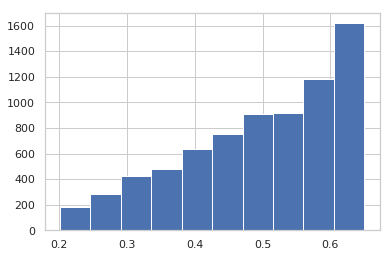

In [13]:
_ = plt.hist(joined['redshift'][mask])

## Comparing Mu-Star w/ Lambda

In [14]:
col1 = 'LAMBDA_CHISQ'
col2 = 'Ngals_gauss005_r200_02Lstar'
col3 = 'redshift'

Text(0,0.5,'Ngals_gauss005_r200_02Lstar')

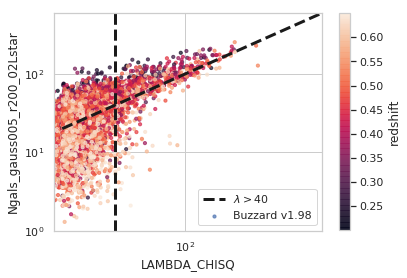

In [15]:
xline  = np.linspace(20.,600.,100)
plt.plot(xline,xline,'k--',lw=3)
plt.axvline(40,color='k',ls='--',lw=3,label='$\lambda>40$')
plt.scatter(joined[col1],joined[col2],c=joined[col3],alpha=0.7,s=10,label='Buzzard v1.98')

plt.xscale('log')
plt.yscale('log')
plt.ylim(1.,600.)
plt.xlim(18.,600.)
plt.legend()
plt.colorbar(label='redshift')
plt.xlabel(col1)
plt.ylabel(col2)

In [16]:
col2 = 'MU_dnf_model_r200_02Lstar'

Text(0,0.5,'MU_dnf_model_r200_02Lstar')

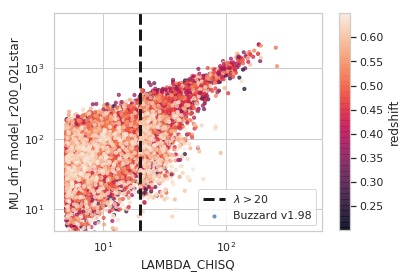

In [17]:
xline  = np.linspace(20.,600.,100)
# plt.plot(xline,xline,'k--',lw=3)
plt.axvline(20,color='k',ls='--',lw=3,label='$\lambda>20$')
plt.scatter(joined[col1],joined[col2],c=joined[col3],alpha=0.7,s=10,label='Buzzard v1.98')

plt.xscale('log')
plt.yscale('log')
plt.ylim(5.,6e3)
plt.xlim(4.,600.)
plt.legend()
plt.colorbar(label='redshift')
plt.xlabel(col1)
plt.ylabel(col2)

## Orientation

In [18]:
def ta(x):
    return np.array(x)

In [19]:
col = 'MU_dnf_model_r200_02Lstar'

mustar= joined[col]
mask = mustar>0.

cosi  = ta(joined['cosi'][mask])
zcls  = ta(joined['redshift'][mask])
m200  = ta(joined['M200'][mask])
mustar= ta(mustar[mask])

In [20]:
def makeBin(variable, xedges):
    xbins = (xedges[1:]+xedges[:-1])/2
    indices = [ np.where((variable >= xedges[i]) & (variable <= xedges[i + 1]))[0] for i in range(len(xedges)-1)]
    return indices, xbins

In [21]:
np.percentile(mustar,np.linspace(0,100,21))

array([   2.61580443,   20.64172501,   26.6158082 ,   31.40045477,
         35.74408452,   40.03358566,   44.20720462,   48.33190101,
         52.65897674,   57.22056543,   62.02627778,   67.36883539,
         73.38060175,   80.10429578,   88.23355002,   98.23250665,
        111.76216094,  130.4929116 ,  162.10448932,  223.01369803,
       2162.36173536])

In [22]:
mustarbins = np.array([0., 100., 200.,300., 3000.])
cosibins   = np.arange(0.,1.2,0.2)

In [23]:
mskeys, msmed = makeBin(mustar,mustarbins)
mslabel = [r'%i < $\mu_{\star}$ < %i'%(zl,zh) for zl,zh in zip(mustarbins[:-1],mustarbins[1:])]


Text(0.5,0,'cosi')

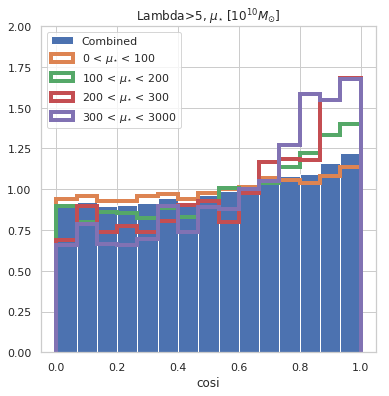

In [24]:
plt.figure(figsize=(6,6))
a = plt.hist(cosi,bins=np.linspace(0,1.,16),density=True,label='Combined')
for i,idx in enumerate(mskeys):
    _ = plt.hist(cosi[idx],bins=a[1],label=mslabel[i],density=True,histtype='step',lw=4)
plt.ylim(0.,2.)
plt.legend(loc=2)
plt.title(r'Lambda>5, $\mu_{\star} \; [10^{10} M_{\odot}]$')
plt.xlabel('cosi')

In [28]:
mustar2 = np.array(cat2['MU'])
cosi
mskeys, msmed = makeBin(mustar2,mustarbins)

In [ ]:
plt.figure(figsize=(6,6))
a = plt.hist(cosi2,bins=np.linspace(0,1.,16),density=True,label='Combined')
for i,idx in enumerate(mskeys):
    _ = plt.hist(cosi2[idx],bins=a[1],label=mslabel[i],density=True,histtype='step',lw=4)
plt.ylim(0.,2.)
plt.legend(loc=2)
plt.title(r'Lambda>5, $\mu_{\star} \; [10^{10} M_{\odot}]$')
plt.xlabel('cosi')

## The Impact on the mass-observable relation

In [65]:
from fit_mor_evolution import mass_observable_relation

In [66]:
cut = mustar>1.
ckeys, cmed = makeBin(cosi[cut],cosibins)
clabel = [r'%.2f < cos(i) < %.2f'%(zl,zh) for zl,zh in zip(cosibins[:-1],cosibins[1:])]

x = m200[cut]
y = mustar[cut]

In [69]:
outs = []

print('For different orienations')
mor = mass_observable_relation()
mor.add_dataset('all',x,y,y_label='mu_obs')

mor.fit_kllr('all',is_log=True,nbins=16,percentile=[16,84])
mor.fit_linmix('all',is_log=True,nbins=16,percentile=[16,84],maxiter=20000)

# mor.add_dataset('all',x,y2,y_label='mu_obs')
# mor.fit_kllr('all',is_log=True,nbins=16,percentile=[16,84])

# for idx,zli in zip(ckeys,clabel):
#     print('cbin: %s'%zli)
#     mor.add_dataset(zli,x[idx],y[idx],y_label='mu_obs')
#     mor.fit_kllr(zli,is_log=True,nbins=16,percentile=[16,84])
#     mor.fit_linmix(zli,is_log=True,nbins=16,percentile=[16,84])
    
#     outs.append(mor)
#     print('\n')

For different orienations
Welcome Mass-Observable Relation Fit


100%|██████████| 16/16 [00:06<00:00,  2.43it/s]
Process Process-3:
Process Process-7:
Process Process-1:
Process Process-10:
Process Process-6:
Process Process-11:
Process Process-12:
Process Process-8:
Process Process-9:
Traceback (most recent call last):
  File "/cvmfs/des.opensciencegrid.org/fnal/anaconda2/envs/des18a/lib/python2.7/multiprocessing/process.py", line 267, in _bootstrap
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/cvmfs/des.opensciencegrid.org/fnal/anaconda2/envs/des18a/lib/python2.7/multiprocessing/process.py", line 267, in _bootstrap
  File "/cvmfs/des.opensciencegrid.org/fnal/anaconda2/envs/des18a/lib/python2.7/multiprocessing/process.py", line 267, in _bootstrap
  File "/cvmfs/des.opensciencegrid.org/fnal/anaconda2/envs/des18

KeyboardInterrupt: 

  File "/cvmfs/des.opensciencegrid.org/fnal/anaconda2/envs/des18a/lib/python2.7/multiprocessing/process.py", line 267, in _bootstrap
    self.run()
    self.run()
    self.run()
    self.run()
    self.run()
    self.run()
    self.run()
    self.run()
    self.run()
    self.run()
    self.run()
    self.run()
  File "/cvmfs/des.opensciencegrid.org/fnal/anaconda2/envs/des18a/lib/python2.7/multiprocessing/process.py", line 114, in run
  File "/cvmfs/des.opensciencegrid.org/fnal/anaconda2/envs/des18a/lib/python2.7/multiprocessing/process.py", line 114, in run
  File "/cvmfs/des.opensciencegrid.org/fnal/anaconda2/envs/des18a/lib/python2.7/multiprocessing/process.py", line 114, in run
  File "/cvmfs/des.opensciencegrid.org/fnal/anaconda2/envs/des18a/lib/python2.7/multiprocessing/process.py", line 114, in run
  File "/cvmfs/des.opensciencegrid.org/fnal/anaconda2/envs/des18a/lib/python2.7/multiprocessing/process.py", line 114, in run
  File "/cvmfs/des.opensciencegrid.org/fnal/anaconda2/env

In [199]:
def plot_line(x,y,ym,yp,color=None,ax=None,label="",ls='-',lw=1, fill=True):
    if ax is None: ax = plt.axes()
        
    #ax.plot(x, y, lw=6, color='k', label="")
    p = ax.plot(x, y, color=color, label=label, ls=ls, lw=lw)
    color = p[0].get_color()
    if fill:
        ax.fill_between(x,ym,yp, lw=3, color=color, alpha = 0.4)
    return color
    
def plot_output(self,name,var,is_log=True,ax=None,color=None,show_data=True,show_kllr=True):
    if ax is None: ax = plt.axes()

#     linmix = self.data[name]['linmix']        
#     color  = plot_line(linmix['x'],linmix[var],linmix[var+'-'],linmix[var+'+'],
#                        ax=ax,label='',ls='--',lw=3,color=color)

    if show_kllr:
        kllr   = self.data[name]['kllr']
        _      = plot_line(kllr['x'],kllr[var],kllr[var+'-'],kllr[var+'+']
                          ,ax=ax,label=name,color=color)
        
    if (show_data) & (var=='y'):
        x,y,_,_ = self.get_variable(name,is_log=is_log)
        ax.scatter(x,y, s=30, alpha=0.1, color=color, label="")

    return ax


In [194]:
import matplotlib.pyplot as plt
import matplotlib
plt.rcParams.update({'font.size': 16})
#Plotting parameters
import matplotlib as mpl

mpl.rcParams['xtick.direction'], mpl.rcParams['ytick.direction'] = 'in', 'in'
mpl.rcParams['xtick.major.size'], mpl.rcParams['xtick.minor.size'] = 14, 8
mpl.rcParams['xtick.major.width'], mpl.rcParams['xtick.minor.width'] = 1.2, 0.8
mpl.rcParams['xtick.major.pad'], mpl.rcParams['xtick.minor.pad'] = 10, 10
mpl.rcParams['ytick.major.size'], mpl.rcParams['ytick.minor.size'] = 14, 8
mpl.rcParams['ytick.major.width'], mpl.rcParams['ytick.minor.width'] = 1.2, 0.8
mpl.rcParams['xtick.labelsize'], mpl.rcParams['ytick.labelsize'] = 20, 20

# Parameters used in this module
# One dictionary to store default values
# Another that user can view/change as necessary
Default_Params = {'default_cmap'   : plt.cm.coolwarm,
                  'title_fontsize' : 25,
                  'legend_fontsize': 22,
                  'xlabel_fontsize': 30,
                  'ylabel_fontsize': 30,
                  'scatter_factor' : 1.0}

Params = Default_Params.copy()

In [195]:
ylabel=r'$\mu_{\star}$'
xlabel=r'$M_{200}$'

Text(0.5,0,'$\\mu_{\\star}$')

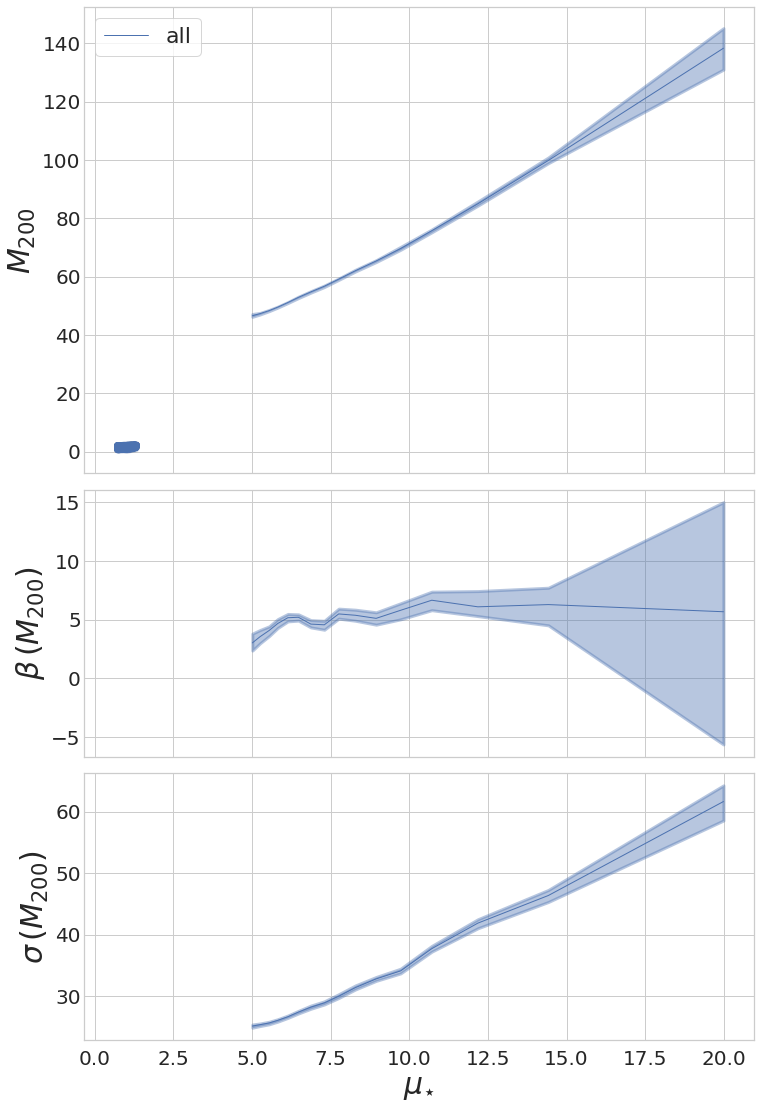

In [136]:
# #Generate figure if none provided
# fig, ax = plt.subplots(3, 1, figsize=(12, 19), sharex = True,
#                        gridspec_kw = {'height_ratios':[1.75, 1, 1]})

# plt.subplots_adjust(hspace = 0.05)

# [a.grid(True) for a in ax]

# lab = 'all'
# plot_output(mor,lab, 'y'      , show_data=True, ax = ax[0])
# plot_output(mor,lab, 'slope'  , show_data=False, ax = ax[1])
# plot_output(mor,lab, 'scatter', show_data=False , ax = ax[2])

    
# # labels = clabel
# # for lab in labels:
# #     plot_output(mor,lab, 'y', show_data=False, ax = ax[0])
# #     plot_output(mor,lab, 'slope'  , show_data=False, ax = ax[1])
# #     plot_output(mor,lab, 'scatter', show_data=False , ax = ax[2])

# ax[0].legend(fontsize=Params['legend_fontsize'])

# ax[0].set_ylabel(xlabel, size=Params['ylabel_fontsize'])
# ax[1].set_ylabel(r"$\beta\,$(%s)" % xlabel,  size=Params['ylabel_fontsize'])
# ax[2].set_ylabel(r"$\sigma\,$(%s)" % xlabel, size=Params['ylabel_fontsize'])
# ax[2].set_xlabel(ylabel, size=Params['xlabel_fontsize'])

In [111]:
# #Generate figure if none provided
# fig, ax = plt.subplots(3, 1, figsize=(12, 19), sharex = True,
#                        gridspec_kw = {'height_ratios':[1.75, 1, 1]})

# plt.subplots_adjust(hspace = 0.05)

# [a.grid(True) for a in ax]

# # lab = 'all'
# # plot_output(mor,lab, 'y', show_data=True, ax = ax[0])
# # plot_output(mor,lab, 'slope'  , show_data=False, ax = ax[1])
# # plot_output(mor,lab, 'scatter', show_data=False , ax = ax[2])

    
# labels = clabel
# for lab in labels:
#     plot_output(mor,lab, 'y', show_data=False, ax = ax[0])
#     plot_output(mor,lab, 'slope'  , show_data=False, ax = ax[1])
#     plot_output(mor,lab, 'scatter', show_data=False , ax = ax[2])

# ax[0].legend(fontsize=Params['legend_fontsize'])

# ax[0].set_ylabel(xlabel, size=Params['ylabel_fontsize'])
# ax[1].set_ylabel(r"$\beta\,$(%s)" % xlabel,  size=Params['ylabel_fontsize'])
# ax[2].set_ylabel(r"$\sigma\,$(%s)" % xlabel, size=Params['ylabel_fontsize'])
# ax[2].set_xlabel(ylabel, size=Params['xlabel_fontsize'])

## Mu-Star Lambda Relation

In [137]:
lbd = ta(joined['LAMBDA_CHISQ'][mask])
y2  = lbd#[cut]
y   = mustar
x   = m200

In [196]:
print('For different orienations')
mor = mass_observable_relation()
mor.add_dataset('all',y2,y,y_label='mu_obs')
mor.fit_kllr('all',is_log=True,nbins=31,percentile=[16,84],kernel_width=0.4)

lcut = 16
cut = y2>=lcut
mor.add_dataset('lambda>%i'%lcut,y2[cut],y[cut],y_label='mu_obs')
mor.fit_kllr('lambda>%i'%lcut,is_log=True,nbins=31,percentile=[16,84],kernel_width=0.4)

# mor.fit_linmix('all',is_log=True,nbins=16,percentile=[16,84],maxiter=20000)


For different orienations
Welcome Mass-Observable Relation Fit


100%|██████████| 31/31 [00:02<00:00, 11.83it/s]


Text(0.5,0,'$Log(\\lambda_{RM})$')

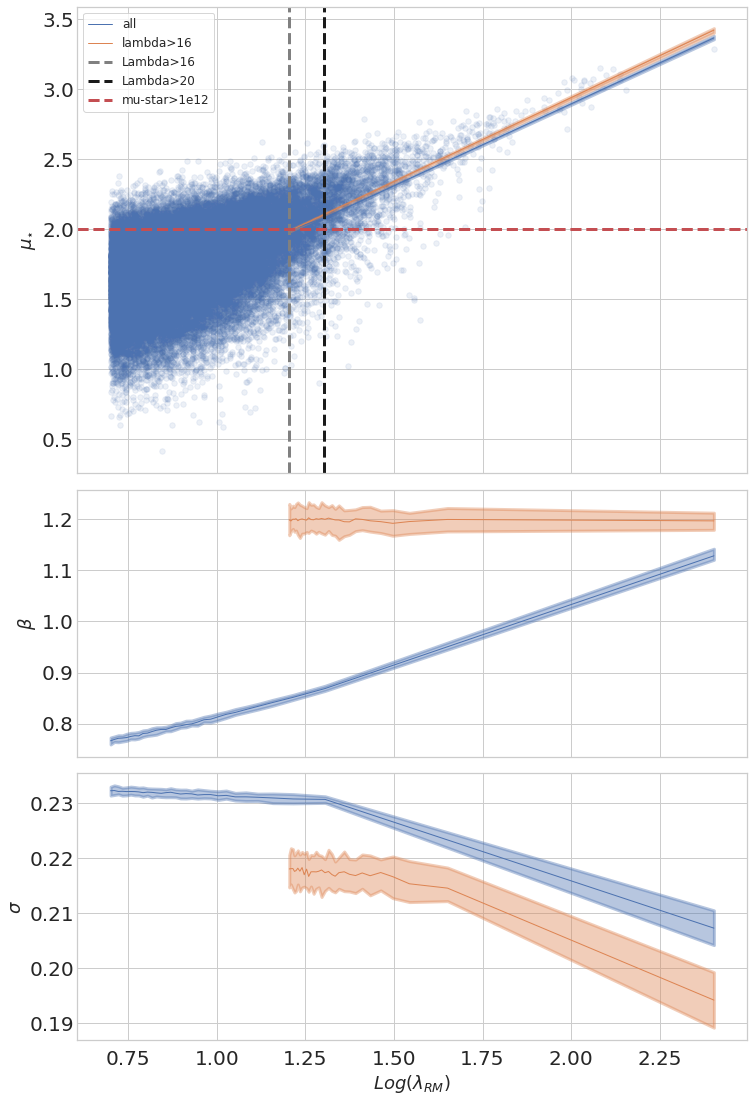

In [200]:
#Generate figure if none provided
fig, ax = plt.subplots(3, 1, figsize=(12, 19), sharex = True,
                       gridspec_kw = {'height_ratios':[1.75, 1, 1]})

plt.subplots_adjust(hspace = 0.05)

[a.grid(True) for a in ax]

lab = 'all'
plot_output(mor,lab, 'y'      , show_data=True, ax = ax[0])
plot_output(mor,lab, 'slope'  , show_data=False, ax = ax[1])
plot_output(mor,lab, 'scatter', show_data=False , ax = ax[2])

lab = 'lambda>%i'%lcut
plot_output(mor,lab, 'y'      , show_data=False, ax = ax[0])
plot_output(mor,lab, 'slope'  , show_data=False, ax = ax[1])
plot_output(mor,lab, 'scatter', show_data=False, ax = ax[2])
    
# labels = clabel
# for lab in labels:
#     plot_output(mor,lab, 'y', show_data=False, ax = ax[0])
#     plot_output(mor,lab, 'slope'  , show_data=False, ax = ax[1])
#     plot_output(mor,lab, 'scatter', show_data=False , ax = ax[2])

ax[0].axvline(np.log10(lcut),color='gray',ls='--',lw=3,label='Lambda>%i'%lcut)
ax[0].axvline(np.log10(20),color='k',ls='--',lw=3,label='Lambda>20')
ax[0].axhline(np.log10(100),color='r',ls='--',lw=3,label='mu-star>1e12')
ax[0].legend(fontsize=12)

ax[0].set_ylabel(ylabel, size=18)
ax[1].set_ylabel(r"$\beta$",  size=18)
ax[2].set_ylabel(r"$\sigma$", size=18)
ax[2].set_xlabel(r'$Log(\lambda_{RM})$', size=18)

Text(0.5,0,'$Log(\\lambda_{RM})$')

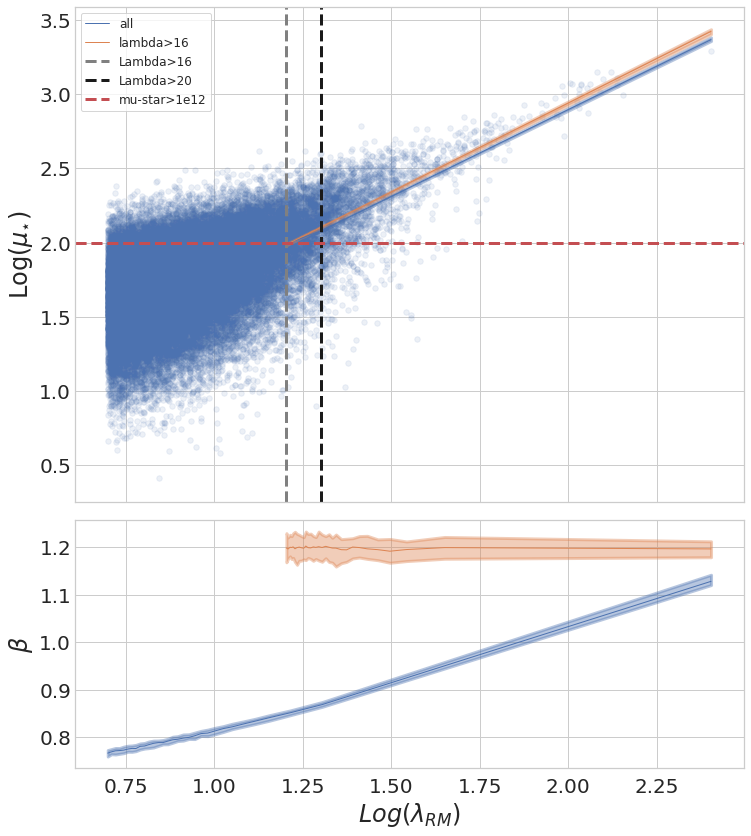

In [207]:
#Generate figure if none provided
fig, ax = plt.subplots(2, 1, figsize=(12, 14), sharex = True,
                       gridspec_kw = {'height_ratios':[2., 1]})

plt.subplots_adjust(hspace = 0.05)

[a.grid(True) for a in ax]

lab = 'all'
plot_output(mor,lab, 'y'      , show_data=True, ax = ax[0])
plot_output(mor,lab, 'slope'  , show_data=False, ax = ax[1])
# plot_output(mor,lab, 'scatter', show_data=False , ax = ax[2])

lab = 'lambda>%i'%lcut
plot_output(mor,lab, 'y'      , show_data=False, ax = ax[0])
plot_output(mor,lab, 'slope'  , show_data=False, ax = ax[1])
# plot_output(mor,lab, 'scatter', show_data=False, ax = ax[2])
    
# labels = clabel
# for lab in labels:
#     plot_output(mor,lab, 'y', show_data=False, ax = ax[0])
#     plot_output(mor,lab, 'slope'  , show_data=False, ax = ax[1])
#     plot_output(mor,lab, 'scatter', show_data=False , ax = ax[2])

ax[0].axvline(np.log10(lcut),color='gray',ls='--',lw=3,label='Lambda>%i'%lcut)
ax[0].axvline(np.log10(20),color='k',ls='--',lw=3,label='Lambda>20')
ax[0].axhline(np.log10(100),color='r',ls='--',lw=3,label='mu-star>1e12')
ax[0].legend(fontsize=12)

ax[0].set_ylabel(r'Log$(\mu_{\star})$', size=24)
ax[1].set_ylabel(r"$\beta$",  size=24)
# ax[2].set_ylabel(r"$\sigma$", size=18)
ax[1].set_xlabel(r'$Log(\lambda_{RM})$', size=24)

In [198]:
1.*np.count_nonzero(y>100)/np.count_nonzero(y2>20)

5.004536290322581

In [188]:
y

array([122.39061668,  49.24030122,  18.55441789, ...,  75.16527268,
        12.09344171,  46.85758819])

In [142]:
np.mean(mor.data['all']['kllr']['slope'])

0.8211773161310421

In [143]:
np.mean(mor.data['all']['kllr']['intercept'])

0.9930119513454301

In [144]:
mulog20 = 1.09+0.854*np.log10(20)

In [ ]:
10**mulog20#*(1+0.71)

In [ ]:
10**0.234-1